# Wavepackets

A general wavepacket can be expressed as the product of an envelope function and a carrier wave

$$\psi(x,t)=f(x-v_gt)\cos(k(x-v_p)t)$$

where $v_g$ is the group velocity, $v_p$ is the phase velocity and $k$ is the central wavenumber of the wavepacket. Consider the example of a spreading Gaussian

$$\psi(x,t)=\sum_{m=-m_0}^{m_0}\exp\bigg(-\frac{(k_m-k)^2}{2\sigma_k^2}\bigg)\cos(k_m-\omega(k_m)t)$$

with dispersion relation $\omega(k_m)=ck_m+dk_m^3$. In this summation, $k_m$ denotes wavenumbers at discrete intervals from the central wavenumber $k$ such that $k_m=k+m\Delta k$, so we $\psi$ is effectively a sum of many different wavenumber components.

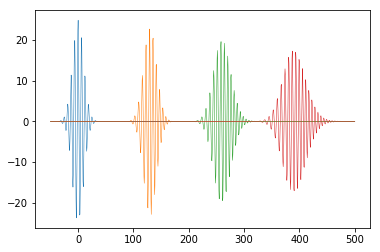

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

c=1
d=0.1
k=1
sigma_k=0.1
Delta_k=0.01
m_0=30

def omega(k_m):
    return c*k_m+d*k_m**3

def cosine(k_m,x,t):
    return np.cos(k_m*x-omega(k_m)*t)

def Gaussian(k_m):
    return np.exp(-0.5*(k_m-k)**2/sigma_k**2)

def psi(x,t):
    psi=0
    for m in range(-m_0,m_0+1):
        k_m=k+m*Delta_k
        psi=psi+Gaussian(k_m)*cosine(k_m,x,t)
    return psi

x1=np.linspace(-50,500,num=1000)
t1=[0,100,200,300]

for time in t1:
    plt.plot(x1,psi(x,time),lw=0.5)
    
plt.show()

As might be expected, taking $d\neq0$ shows that the wavepacket spreads out - this is dispersion. Note that if $d>0$, then the group velocity

$$v_g=\frac{\partial\omega}{\partial k}=c+3dk^2$$

is greater than the phase velocity 

$$v_p=\frac{\omega}{k}=c+dk^2$$

and hence the envelope propagates faster than the phase.

If $d<0$, then conversely the phase propagates faster than the envelope.

A travelling square wave is given by the Fourier series

$$\begin{align}
\Psi(x,t)&=\cos(kx-\omega(k)t)-\tfrac{1}{3}\cos(kx-\omega(k)t)+\tfrac{1}{5}\cos(kx-\omega(k)t)+\dots\\
&\approx\sum_{m=0}^{m_0}\frac{(-1)^m}{2m+1}\cos(k_mx-\omega(k_m)t)
\end{align}$$

if we truncate after a sufficiently large number of terms. We now have $k_m=(2m+1)k$ as the wavevector of $m^{\text{th}}$ component.


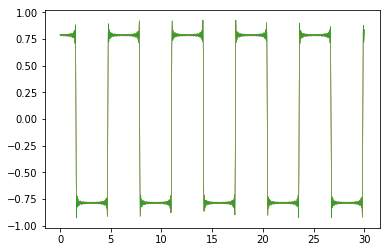

In [55]:
def Psi(x,t):
    Psi=0
    for m in range(0,m_0+1):
        k_m=(2*m+1)*k
        Psi=Psi+((-1)**m/(2*m+1))*cosine(k_m,x,t)
    return Psi

x2=np.linspace(0,30,num=1000)
t2=[0,np.pi,2*np.pi]

for time in t2:
    plt.plot(x2,Psi(x2,0),lw=0.5)
    
plt.show()